# DSCI 417 - Homework 03

**Malcolm Nichols**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr

spark = SparkSession.builder.getOrCreate()

## Problem 1: Terminology (4/5)

1. StructType
2. StructField
3. DoubleType
4. Show()
5. describe() and summary()
6. dropna()
7. col() and expr() (withColumn() and select())
8. agg()
9. F.upper() and F.length (col() and expr())
10. filter()

## Probelm 2: Columns and Expressions (5/5)

[1, 2, 5, 6, 7, 10]  #2 will error, and 3 will not

## Problem 3: Diamonds Data (Part 1)

In [0]:
di_schema = (
  'carat DOUBLE, cut STRING, color STRING, clarity STRING, depth DOUBLE,'
  'table DOUBLE, price INTEGER, x DOUBLE, y DOUBLE, z DOUBLE'
)

di_df = (
  spark.read
  .option('delimiter', '\t')
  .option('header', True)
  .schema(di_schema)
  .csv('/FileStore/tables/diamonds.txt')
)

di_df.printSchema()

root
-- carat: double (nullable = true)
-- cut: string (nullable = true)
-- color: string (nullable = true)
-- clarity: string (nullable = true)
-- depth: double (nullable = true)
-- table: double (nullable = true)
-- price: integer (nullable = true)
-- x: double (nullable = true)
-- y: double (nullable = true)
-- z: double (nullable = true)

In [0]:
print(di_df.count())

53940

In [0]:
di_df.show(10)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
carat| cut|color|clarity|depth|table|price| x| y| z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
 0.23| Ideal| E| SI2| 61.5| 55.0| 326|3.95|3.98|2.43|
 0.21| Premium| E| SI1| 59.8| 61.0| 326|3.89|3.84|2.31|
 0.23| Good| E| VS1| 56.9| 65.0| 327|4.05|4.07|2.31|
 0.29| Premium| I| VS2| 62.4| 58.0| 334| 4.2|4.23|2.63|
 0.31| Good| J| SI2| 63.3| 58.0| 335|4.34|4.35|2.75|
 0.24|Very Good| J| VVS2| 62.8| 57.0| 336|3.94|3.96|2.48|
 0.24|Very Good| I| VVS1| 62.3| 57.0| 336|3.95|3.98|2.47|
 0.26|Very Good| H| SI1| 61.9| 55.0| 337|4.07|4.11|2.53|
 0.22| Fair| E| VS2| 65.1| 61.0| 337|3.87|3.78|2.49|
 0.23|Very Good| H| VS1| 59.4| 61.0| 338| 4.0|4.05|2.39|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 10 rows

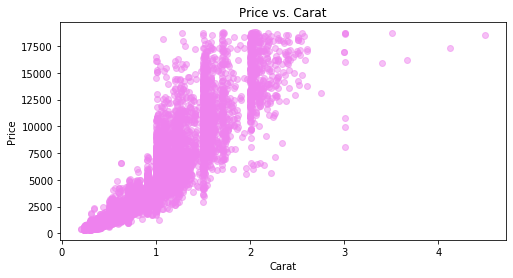

In [0]:
sample_pdf = di_df.sample(withReplacement = False, fraction = 0.25, seed = 1).toPandas()

plt.figure(figsize = [8,4])
plt.scatter(sample_pdf.carat, sample_pdf.price, alpha = 0.5, c = 'violet')
plt.title('Price vs. Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

## Problem 4: Diamonds Data (Part 2)

In [0]:
di_df.sort('price', ascending=False).show(5)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
carat| cut|color|clarity|depth|table|price| x| y| z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
 2.29| Premium| I| VS2| 60.8| 60.0|18823| 8.5|8.47|5.16|
 2.0|Very Good| G| SI1| 63.5| 56.0|18818| 7.9|7.97|5.04|
 1.51| Ideal| G| IF| 61.7| 55.0|18806|7.37|7.41|4.56|
 2.07| Ideal| G| SI2| 62.5| 55.0|18804| 8.2|8.13|5.11|
 2.0|Very Good| H| SI1| 62.8| 57.0|18803|7.95| 8.0|5.01|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 5 rows

In [0]:
di_df.sort('carat', ascending=False).show(5)

+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
carat| cut|color|clarity|depth|table|price| x| y| z|
+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
 5.01| Fair| J| I1| 65.5| 59.0|18018|10.74|10.54|6.98|
 4.5| Fair| J| I1| 65.8| 58.0|18531|10.23|10.16|6.72|
 4.13| Fair| H| I1| 64.8| 61.0|17329| 10.0| 9.85|6.43|
 4.01|Premium| J| I1| 62.5| 62.0|15223|10.02| 9.94|6.24|
 4.01|Premium| I| I1| 61.0| 61.0|15223|10.14| 10.1|6.17|
+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
only showing top 5 rows

In [0]:
diamonds_ppc = di_df.select('*', expr('ROUND(price / carat, 2) AS price_per_carat'))
diamonds_ppc.sort('price_per_carat', ascending=False).show(5)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
carat| cut|color|clarity|depth|table|price| x| y| z|price_per_carat|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
 1.04|Very Good| D| IF| 61.3| 56.0|18542|6.53|6.55|4.01| 17828.85|
 1.07| Premium| D| IF| 60.9| 58.0|18279|6.67|6.57|4.03| 17083.18|
 1.03| Ideal| D| IF| 62.0| 56.0|17590|6.55|6.44|4.03| 17077.67|
 1.07|Very Good| D| IF| 60.9| 58.0|18114|6.57|6.67|4.03| 16928.97|
 1.02|Very Good| D| IF| 61.7| 59.0|17100|6.42|6.52|3.99| 16764.71|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
only showing top 5 rows

In [0]:
diamonds_ppc.sort('price_per_carat').show(5)

+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
carat| cut|color|clarity|depth|table|price| x| y| z|price_per_carat|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
 0.43|Premium| H| I1| 62.0| 59.0| 452|4.78|4.83|2.98| 1051.16|
 0.32|Premium| E| I1| 60.9| 58.0| 345|4.38|4.42|2.68| 1078.13|
 0.31| Good| J| SI2| 63.3| 58.0| 335|4.34|4.35|2.75| 1080.65|
 0.33| Ideal| J| SI2| 62.4| 54.0| 366|4.43|4.45|2.77| 1109.09|
 0.31| Ideal| J| SI2| 62.2| 54.0| 344|4.35|4.37|2.71| 1109.68|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
only showing top 5 rows

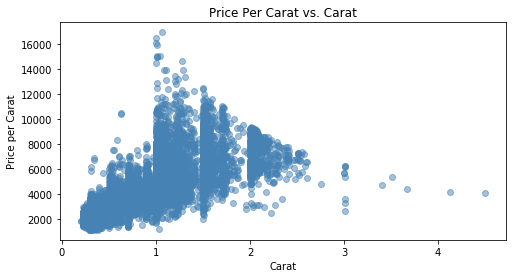

In [0]:
ppc_sample_pdf = diamonds_ppc.sample(withReplacement=False, fraction=0.25, seed=1).toPandas()

plt.figure(figsize = [8,4])
plt.scatter(ppc_sample_pdf.carat, ppc_sample_pdf.price_per_carat, alpha = 0.5, c = 'steelblue')
plt.title('Price Per Carat vs. Carat')
plt.xlabel('Carat')
plt.ylabel('Price per Carat')
plt.show()